In [16]:
# Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
#Ingestamos los datos y le damos una primera mirada a los datos de nuestro dataframe
df_movie= pd.read_csv(r'C:\Users\Edwin\Desktop\Henry\M7. Proyecto Individual\df_movies_clean')
df_movie.head(2)

C:\Users\Edwin\AppData\Local\Temp\ipykernel_1108\2214815647.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie= pd.read_csv(r'C:\Users\Edwin\Desktop\Henry\M7. Proyecto Individual\df_movies_clean')


,belongs_to_collection,genres,spoken_languages,production_companies,production_countries,cast,crew,directors,budget,id,...,revenue,runtime,status,tagline,title,vote_average,vote_count,id.1,release _date,release_year
0,Toy Story,"['Animation', 'Comedy', 'Family']",['English'],['Pixar Animation Studios'],['United States of America'],"[('Woody (voice)', 'Tom Hanks'), ('Buzz Lighty...","[('Directing', 'John Lasseter'), ('Writing', '...","['John Lasseter', 'Roman Figun', 'Desirée Mour...",30000000,862,...,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,862,1995-10-30,1995.0
1,NaN,"['Adventure', 'Fantasy', 'Family']","['English', 'Français']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"[('Alan Parrish', 'Robin Williams'), ('Samuel ...","[('Production', 'Larry J. Franco'), ('Writing'...",['Joe Johnston'],65000000,8844,...,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,8844,1995-12-15,1995.0


In [ ]:
# Podemos ver el numero de registros
df_movie.shape

(45379, 23)

In [ ]:
#Podemos ver el número de registros, el número de columnas y sus tipos (cualitativas y cuantitativas) 
# para así empezar a delinear que tipos de procesos podemos hacer con ellos
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   genres                 45379 non-null  object 
 2   spoken_languages       45379 non-null  object 
 3   production_companies   45379 non-null  object 
 4   production_countries   45379 non-null  object 
 5   cast                   45379 non-null  object 
 6   crew                   45379 non-null  object 
 7   directors              45379 non-null  object 
 8   budget                 45379 non-null  object 
 9   id                     45379 non-null  object 
 10  original_language      45368 non-null  object 
 11  overview               44438 non-null  object 
 12  popularity             45377 non-null  object 
 13  revenue                45379 non-null  float64
 14  runtime                45130 non-null  float64
 15  st

In [ ]:
df_movie.describe()

,revenue,runtime,vote_average,vote_count,id.1,release_year
count,4.537900e+04,45130.000000,45376.000000,45376.000000,45379.000000,45376.000000
mean,1.122936e+07,94.181675,5.624070,110.096439,108157.438110,1991.881193
std,6.438789e+07,38.341059,1.915423,491.742894,112328.332777,24.055360
min,0.000000e+00,0.000000,0.000000,0.000000,2.000000,1874.000000
25%,0.000000e+00,85.000000,5.000000,3.000000,26378.500000,1978.000000
50%,0.000000e+00,95.000000,6.000000,10.000000,59873.000000,2001.000000
75%,0.000000e+00,107.000000,6.800000,34.000000,156959.500000,2010.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000,469172.000000,2020.000000


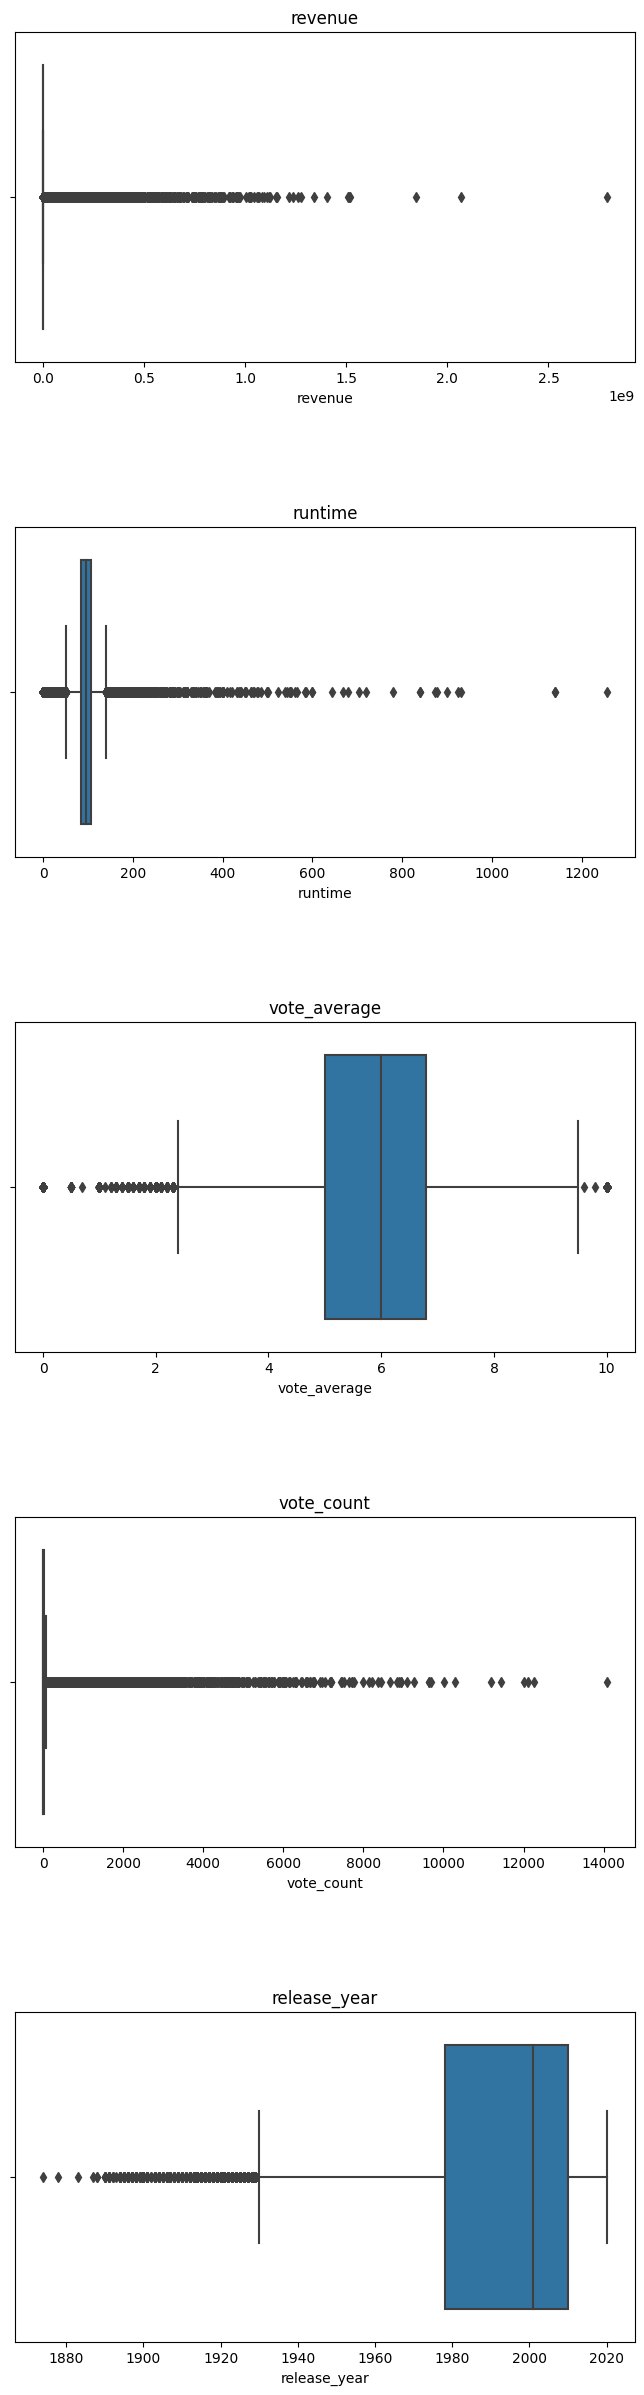

In [ ]:
# Generar gráficas individuales pues
# las variables numéricas estan en rangos diferentes

cols_num = ["revenue","runtime","vote_average","vote_count","release_year"]

fig, ax = plt.subplots (nrows= 5, ncols=1, figsize = (8,30))
fig.subplots_adjust(hspace=0.5)

for i , col in enumerate (cols_num):
    sns.boxplot(x=col, data=df_movie, ax=ax[i])
    ax[i].set_title(col)


# revenue	Recaudación de la pelicula, en dolares
# runtime	Duración de la película, en minutos
# vote_average	Puntaje promedio de reseñas de la pelicula
# vote_count	Numeros de votos recibidos por la pelicula, en TMDB
# release_year	Fecha de estreno de la película

In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   genres                 45379 non-null  object 
 2   spoken_languages       45379 non-null  object 
 3   production_companies   45379 non-null  object 
 4   production_countries   45379 non-null  object 
 5   cast                   45379 non-null  object 
 6   crew                   45379 non-null  object 
 7   directors              45379 non-null  object 
 8   budget                 45379 non-null  object 
 9   id                     45379 non-null  object 
 10  original_language      45368 non-null  object 
 11  overview               44438 non-null  object 
 12  popularity             45377 non-null  object 
 13  revenue                45379 non-null  float64
 14  runtime                45130 non-null  float64
 15  st

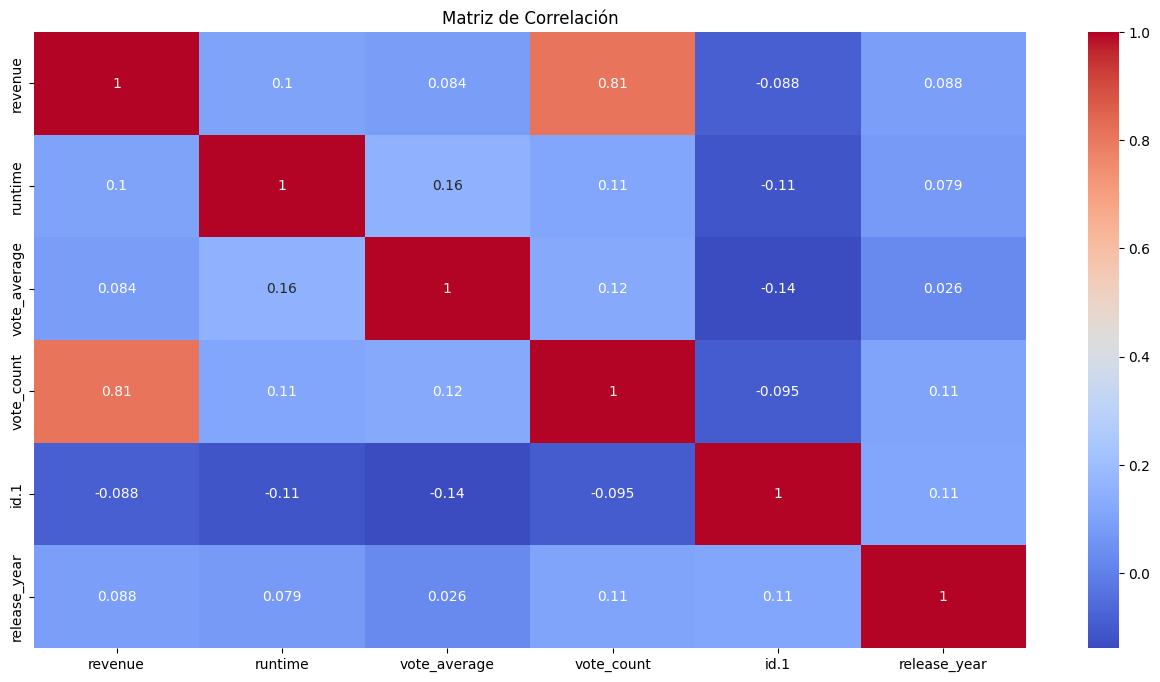

In [3]:
df = df_movie.drop('id', axis = 1)
data_num= df.select_dtypes(exclude = ['object'])
data_num.head(2)

correlation_matrix = data_num.corr()

plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Entre mas alto el numero de correlacion significa que guardan una mayor tendencia al mismo comporamiento,
# por lo que las variables que cumples con esto se consideran linealmente dependientes.
# Por lo que las que tengan menor correlación entre ellas nos dan comportamientos diferentes
# entre variables ya que serán linealmente independientes

In [11]:
 # Se procede a tokenizar la variable objetivo
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    if isinstance(texto, float):  # Verificar si el valor es de tipo float
        return []  # Devolver una lista vacía en caso de que sea float

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return(nuevo_texto)

In [14]:
# Se aplica la función de limpieza y tokenización a cada pelicula
df_title = df
df_title['title_tokenizado'] =df_title['title'].apply(lambda x: limpiar_tokenizar(x))
df_title[['title', 'title_tokenizado']].head()

,title,title_tokenizado
0,Toy Story,"[toy, story]"
1,Jumanji,[jumanji]
2,Grumpier Old Men,"[grumpier, old, men]"
3,Waiting to Exhale,"[waiting, to, exhale]"
4,Father of the Bride Part II,"[father, of, the, bride, part, ii]"


In [23]:
# Generación de una nueva columna 'token'
title_tidy = df_title.explode(column='title_tokenizado')
title_tidy = title_tidy.drop(columns='title')
title_tidy = title_tidy.rename(columns={'title_tokenizado':'token'})

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Edwin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
# Obtención de listado de stopwords del inglés
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [24]:
# Filtrado para excluir stopwords
title_tidy = title_tidy[~(title_tidy["token"].isin(stop_words))]

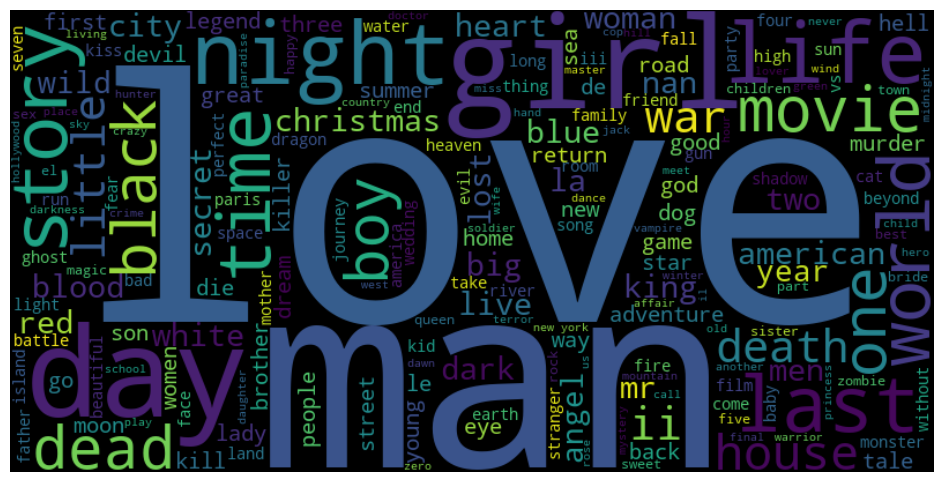

In [25]:
from wordcloud import WordCloud
# Unir todos los tokens en un solo texto
all_tokens = ' '.join(title_tidy['token'].astype(str))

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_tokens)

# Mostrar la nube de palabras
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()